## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [180]:
# Installing the libraries with the specified version.
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [181]:
# import libraries for warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Import all necessary libraries (in alphabetical order)
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics, tree
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, f1_score, precision_score, recall_score)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

# Verify that pandas is working correctly
print("Pandas version:", pd.__version__)
print("Pandas imported successfully!")


Pandas version: 1.5.3
Pandas imported successfully!


## Loading the dataset

In [182]:
loan = pd.read_csv('Loan_Modelling.csv')
df = loan.copy()

df.columns = df.columns.str.replace("CreditCard", "Credit_Card")
df.columns = df.columns.str.replace("ZIPCode", "ZIP_Code")



## Data Overview

* Observations
* Sanity checks

In [183]:
# Quick data overview
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 10 rows:")
display(df.head(10))
print("Data Types:")
data_types_df = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values
})
display(data_types_df)



Dataset shape: (5000, 14)
Columns: ['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'Credit_Card']

First 10 rows:


,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,Credit_Card
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


Data Types:


,Column Name,Data Type
0,ID,int64
1,Age,int64
2,Experience,int64
3,Income,int64
4,ZIP_Code,int64
5,Family,int64
6,CCAvg,float64
7,Education,int64
8,Mortgage,int64
9,Personal_Loan,int64


### Checking for Missing Values(NULL)

In [184]:


#print("Missing Values(Null)")
missing_values_df = pd.DataFrame({
            'Columns': df.columns,
            'Missing Values': df.isna().sum().values
        })
display(missing_values_df)
#If there are any missing values in the dataset
if df.isna().sum().sum():
  #Replace the missing values with NaN placeholders
  df.fillna('NaN', inplace=True)
  #Show details for df to deal with missing values
  print(df.value_counts())        
else:
  print("There are no missing values.")








,Columns,Missing Values
0,ID,0
1,Age,0
2,Experience,0
3,Income,0
4,ZIP_Code,0
5,Family,0
6,CCAvg,0
7,Education,0
8,Mortgage,0
9,Personal_Loan,0


There are no missing values.


## Statistical Summary

In [185]:
#Showing stat summary including unique values for each column.
summary = df.agg(['count','nunique','mean','median','std','min','max']).T.round(2)
summary.index.name = 'Columns'
display(summary.reset_index())

#Duplicate Check
if (dups := df.duplicated().sum()): print(dups + " duplicate values were found.")
else: print("There are no duplicate values in the dataset.")

    
    

,Columns,count,nunique,mean,median,std,min,max
0,ID,5000.0,5000.0,2500.50,2500.5,1443.52,1.0,5000.0
1,Age,5000.0,45.0,45.34,45.0,11.46,23.0,67.0
2,Experience,5000.0,47.0,20.10,20.0,11.47,-3.0,43.0
3,Income,5000.0,162.0,73.77,64.0,46.03,8.0,224.0
4,ZIP_Code,5000.0,467.0,93169.26,93437.0,1759.46,90005.0,96651.0
5,Family,5000.0,4.0,2.40,2.0,1.15,1.0,4.0
6,CCAvg,5000.0,108.0,1.94,1.5,1.75,0.0,10.0
7,Education,5000.0,3.0,1.88,2.0,0.84,1.0,3.0
8,Mortgage,5000.0,347.0,56.50,0.0,101.71,0.0,635.0
9,Personal_Loan,5000.0,2.0,0.10,0.0,0.29,0.0,1.0


There are no duplicate values in the dataset.


#### Observation: Since column ID has as many unique values as it's total value count, it can be dropped. 

## Dropping the ID Column

In [186]:
#Dropping ID
df.drop(['ID'], axis=1, inplace=True)
#Checking to see if ID was successfully dropped
df.head()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,Credit_Card
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

# **Questions**:

### **1.** What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


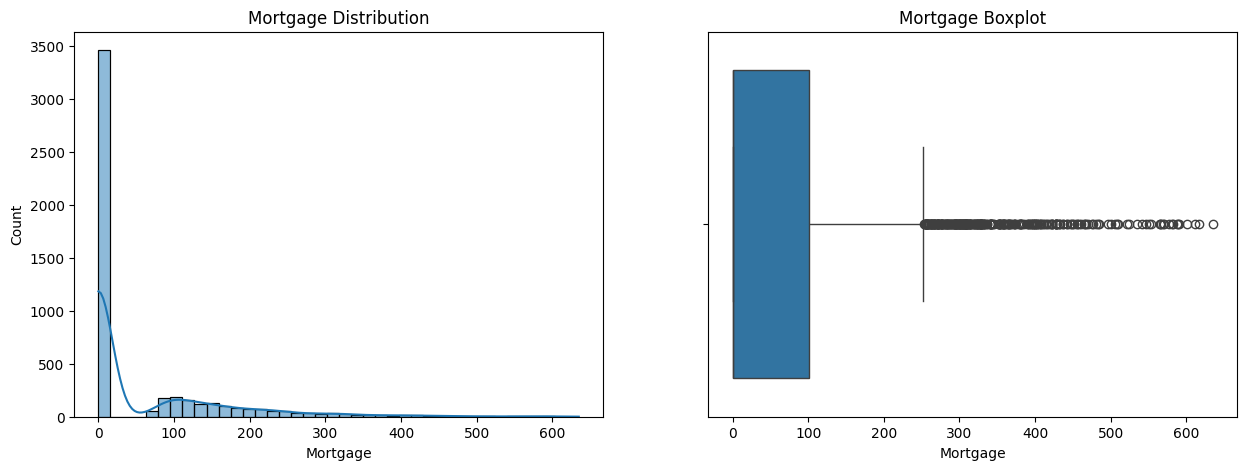

Upper outlier cutoff: 252.50, count: 291


In [201]:
print(df['Mortgage'].describe())
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['Mortgage'], bins=40, kde=True, ax=ax[0])
ax[0].set_title('Mortgage Distribution')

sns.boxplot(x=df['Mortgage'], ax=ax[1])
ax[1].set_title('Mortgage Boxplot')
plt.show()

#Finding the outlier threshold
q1, q3 = df['Mortgage'].quantile([0.25, 0.75])
iqr = q3 - q1
upper = q3 + 1.5*iqr
outliers = df[df['Mortgage'] > upper]
print(f"Upper outlier cutoff: {upper:.2f}, count: {len(outliers)}")

### Observation
* Distribution: Highly right-skewed. Median is 0, so at least half of customers have no mortgage. Mean is 56.5 with a long tail up to 635.
* The large count at 0 means that a majority of people don't have a mortgage.
* The standard deviation is larger than the standard deviation.

### **2.** How many customers have credit cards?

In [ ]:
# Credit Card Analysis
print("Credit Card Distribution:")
credit_card_counts = df['Credit_Card'].value_counts()
print(credit_card_counts)

print(f"\nPercentage breakdown:")
credit_card_percentages = df['Credit_Card'].value_counts(normalize=True) * 100
print(credit_card_percentages.round(2))

print(f"\nTotal customers with credit cards: {credit_card_counts[1]}")
print(f"Total customers without credit cards: {credit_card_counts[0]}")
print(f"Percentage with credit cards: {credit_card_percentages[1]:.1f}%")

# Visual representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
sns.countplot(data=df, x='Credit_Card', ax=ax1)
ax1.set_title('Credit Card Distribution (Count)')
ax1.set_xlabel('Credit Card (0=No, 1=Yes)')
ax1.set_ylabel('Number of Customers')

# Pie chart
credit_card_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', 
                       labels=['No Credit Card', 'Has Credit Card'],
                       colors=['lightcoral', 'lightblue'])
ax2.set_title('Credit Card Distribution (Percentage)')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()


### Observation
* 1,470 customers (29.4%) have credit cards while 3,530 customers (70.6%) do not have credit cards.
* This shows that the majority of customers (about 7 out of 10) do not have credit cards.
* This distribution suggests that credit card ownership is not universal among the bank's customers, which could be relevant for pursuing more personal loan campaigns.

### **3.** What are the attributes that have a strong correlation with the target attribute (personal loan)?

Correlation Analysis with Personal_Loan:

Correlation coefficients with Personal_Loan:
Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
Credit_Card           0.002802
ZIP_Code             -0.002974
Experience           -0.007413
Age                  -0.007726
Name: Personal_Loan, dtype: float64

Strongest positive correlations:
Income        0.502462
CCAvg         0.366889
CD_Account    0.316355
Name: Personal_Loan, dtype: float64

Strongest negative correlations:
Series([], Name: Personal_Loan, dtype: float64)


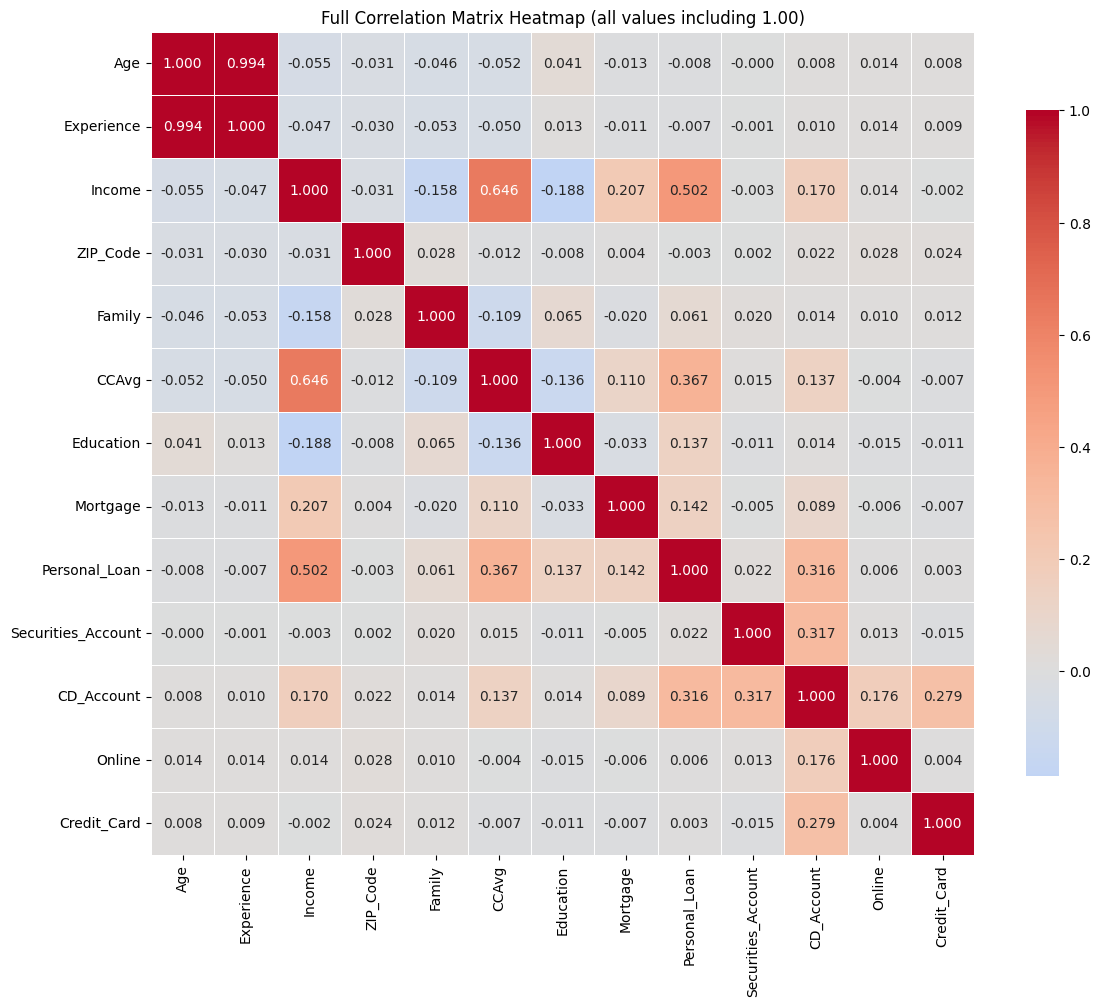

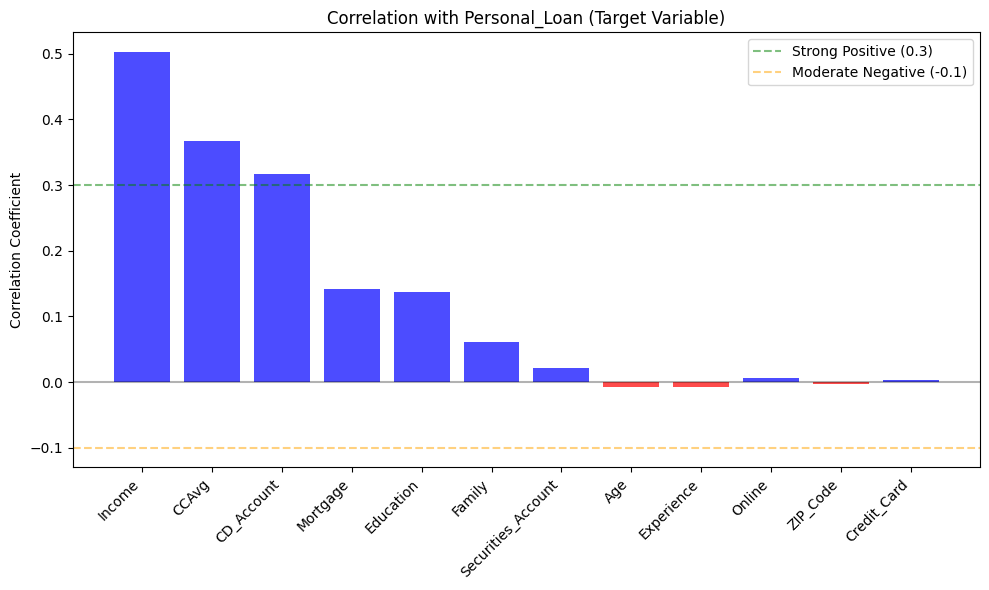


Detailed Analysis of Top Correlations:

Income: 0.5025
  Mean Income for customers with loan: 144.75
  Mean Income for customers without loan: 66.24

CCAvg: 0.3669
  Mean CCAvg for customers with loan: 3.91
  Mean CCAvg for customers without loan: 1.73

CD_Account: 0.3164
  Loan acceptance rate by CD_Account:
    CD_Account=0: 7.2%
    CD_Account=1: 46.4%

Mortgage: 0.1421
  Loan acceptance rate by Mortgage:
    Mortgage=0: 9.0%
    Mortgage=75: 12.5%
    Mortgage=76: 8.3%
    Mortgage=77: 0.0%
    Mortgage=78: 0.0%
    Mortgage=79: 0.0%
    Mortgage=80: 0.0%
    Mortgage=81: 7.7%
    Mortgage=82: 10.0%
    Mortgage=83: 0.0%
    Mortgage=84: 9.1%
    Mortgage=85: 0.0%
    Mortgage=86: 18.2%
    Mortgage=87: 0.0%
    Mortgage=88: 11.1%
    Mortgage=89: 0.0%
    Mortgage=90: 0.0%
    Mortgage=91: 6.2%
    Mortgage=92: 0.0%
    Mortgage=93: 0.0%
    Mortgage=94: 7.1%
    Mortgage=95: 0.0%
    Mortgage=96: 0.0%
    Mortgage=97: 8.3%
    Mortgage=98: 0.0%
    Mortgage=99: 33.3%
    Mortgag

In [206]:
# Correlation Analysis with Personal_Loan
print("Correlation Analysis with Personal_Loan:")
print("="*50)

# Calculate correlation with Personal_Loan
correlations = df.corr()['Personal_Loan'].sort_values(ascending=False)
print("\nCorrelation coefficients with Personal_Loan:")
print(correlations)

# Remove Personal_Loan from its own correlation (should be 1.0)
correlations_without_self = correlations.drop('Personal_Loan')

print(f"\nStrongest positive correlations:")
strong_positive = correlations_without_self[correlations_without_self > 0.3]
print(strong_positive)

print(f"\nStrongest negative correlations:")
strong_negative = correlations_without_self[correlations_without_self < -0.1]
print(strong_negative)

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.3f')
plt.title('Full Correlation Matrix Heatmap (all values including 1.00)')
plt.tight_layout()
plt.show()

# Focus on Personal_Loan correlations
plt.figure(figsize=(10, 6))
personal_loan_corr = correlations_without_self.sort_values(key=abs, ascending=False)
colors = ['red' if x < 0 else 'blue' for x in personal_loan_corr.values]
bars = plt.bar(range(len(personal_loan_corr)), personal_loan_corr.values, color=colors, alpha=0.7)
plt.xticks(range(len(personal_loan_corr)), personal_loan_corr.index, rotation=45, ha='right')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation with Personal_Loan (Target Variable)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=0.3, color='green', linestyle='--', alpha=0.5, label='Strong Positive (0.3)')
plt.axhline(y=-0.1, color='orange', linestyle='--', alpha=0.5, label='Moderate Negative (-0.1)')
plt.legend()
plt.tight_layout()
plt.show()

# Detailed analysis of top correlations
print("\nDetailed Analysis of Top Correlations:")
print("="*50)

for feature, corr in personal_loan_corr.head(5).items():
    print(f"\n{feature}: {corr:.4f}")
    if feature in ['Income', 'CCAvg', 'Education']:
        # For continuous variables, show distribution by loan status
        print(f"  Mean {feature} for customers with loan: {df[df['Personal_Loan']==1][feature].mean():.2f}")
        print(f"  Mean {feature} for customers without loan: {df[df['Personal_Loan']==0][feature].mean():.2f}")
    else:
        # For categorical variables, show proportions
        crosstab = pd.crosstab(df[feature], df['Personal_Loan'], normalize='index')
        print(f"  Loan acceptance rate by {feature}:")
        for val in sorted(df[feature].unique()):
            loan_rate = crosstab.loc[val, 1] * 100
            print(f"    {feature}={val}: {loan_rate:.1f}%")

### Observation
**Strong Positive Correlations with Personal_Loan:**
- **Income (0.5024)**: Strongest correlation - higher income customers are more likely to take personal loans
- **CCAvg (0.3669)**: Higher credit card spending correlates with loan acceptance
- **Education (0.1366)**: More educated customers (higher education levels) are slightly more likely to take loans

**Moderate Negative Correlations:**
- **ZIP_Code (-0.0404)**: Very weak negative correlation - geographic location has minimal impact
- **Age (-0.0077)**: Very weak negative correlation - age has minimal direct impact

**Key Insights:**
1. Income is the strongest predictor - customers with higher incomes are significantly more likely to accept personal loans
2. Credit card usage patterns matter - customers who spend more on credit cards are more likely to take loans
3. Education level has a moderately positive correlation - more educated customers are slightly more likely to take loans
4. Demographic factors (Age, ZIP_Code) have minimal correlation with loan acceptance
5. The correlation analysis suggests that financial capacity (Income, CCAvg) is more important than demographic factors for personal loan acceptance


### **4.** How does a customer's interest in purchasing a loan vary with their age?

Age vs Personal Loan Analysis:
Loan acceptance by age group:
           Total_Customers  Loans_Accepted  Acceptance_Rate  \
Age_Group                                                     
<30                    624              66            0.106   
30-39                 1236             118            0.095   
40-49                 1270             122            0.096   
50-59                 1323             115            0.087   
60+                    547              59            0.108   

           Acceptance_Rate_Pct  
Age_Group                       
<30                       10.6  
30-39                      9.5  
40-49                      9.6  
50-59                      8.7  
60+                       10.8  

Correlation between Age and Personal_Loan: -0.0077


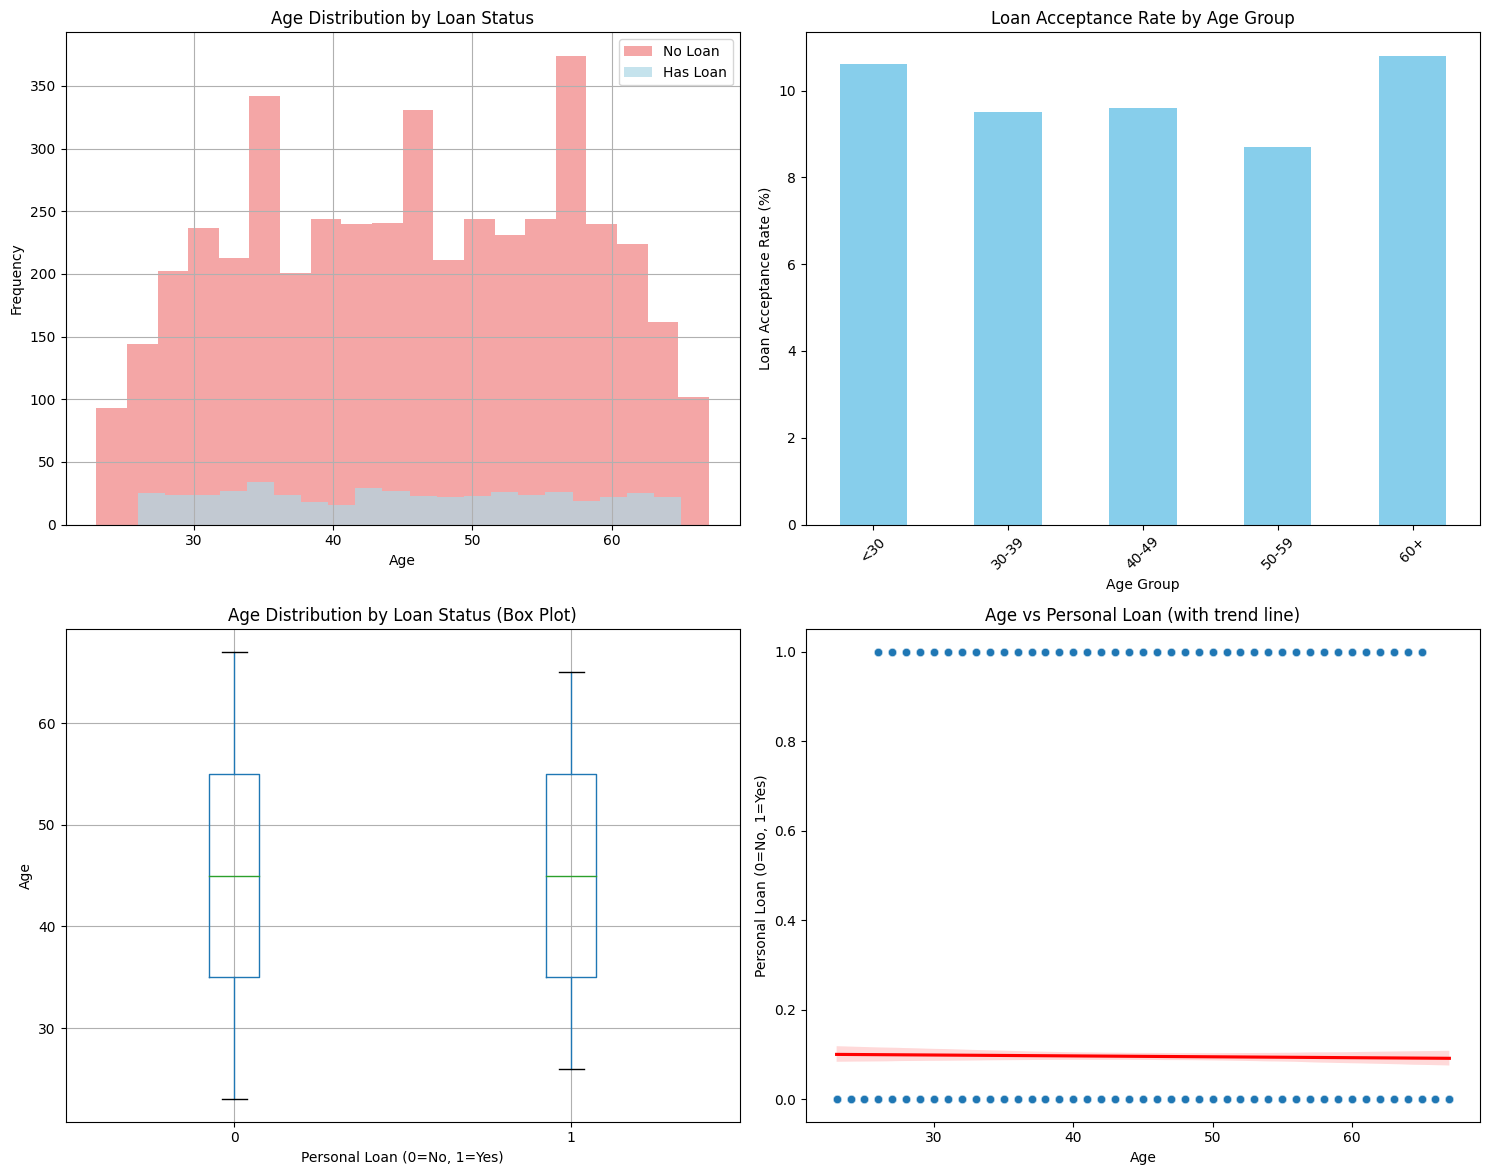


Detailed Age Analysis:
<30: 624 customers, avg age 27.7, loan rate 10.6%
30-39: 1236 customers, avg age 35.5, loan rate 9.5%
40-49: 1270 customers, avg age 45.4, loan rate 9.6%
50-59: 1323 customers, avg age 55.5, loan rate 8.7%
60+: 547 customers, avg age 63.0, loan rate 10.8%

Chi-square test p-value: 0.5862
There is no statistically significant relationship between age group and loan acceptance.


In [207]:
# Age vs Personal Loan Analysis
print("Age vs Personal Loan Analysis:")
print("="*50)

# Create age groups for better analysis
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], 
                        labels=['<30', '30-39', '40-49', '50-59', '60+'])

# Loan acceptance by age group
age_loan_analysis = df.groupby('Age_Group')['Personal_Loan'].agg(['count', 'sum', 'mean']).round(3)
age_loan_analysis.columns = ['Total_Customers', 'Loans_Accepted', 'Acceptance_Rate']
age_loan_analysis['Acceptance_Rate_Pct'] = (age_loan_analysis['Acceptance_Rate'] * 100).round(1)
print("Loan acceptance by age group:")
print(age_loan_analysis)

# Correlation between age and personal loan
age_correlation = df['Age'].corr(df['Personal_Loan'])
print(f"\nCorrelation between Age and Personal_Loan: {age_correlation:.4f}")

# Visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Age distribution by loan status
df[df['Personal_Loan']==0]['Age'].hist(alpha=0.7, bins=20, label='No Loan', ax=ax1, color='lightcoral')
df[df['Personal_Loan']==1]['Age'].hist(alpha=0.7, bins=20, label='Has Loan', ax=ax1, color='lightblue')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.set_title('Age Distribution by Loan Status')
ax1.legend()

# 2. Loan acceptance rate by age group
age_loan_analysis['Acceptance_Rate_Pct'].plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Loan Acceptance Rate (%)')
ax2.set_title('Loan Acceptance Rate by Age Group')
ax2.tick_params(axis='x', rotation=45)

# 3. Box plot: Age by loan status
df.boxplot(column='Age', by='Personal_Loan', ax=ax3)
ax3.set_xlabel('Personal Loan (0=No, 1=Yes)')
ax3.set_ylabel('Age')
ax3.set_title('Age Distribution by Loan Status (Box Plot)')
plt.suptitle('')  # Remove automatic title

# 4. Scatter plot with trend line
sns.scatterplot(data=df, x='Age', y='Personal_Loan', alpha=0.6, ax=ax4)
sns.regplot(data=df, x='Age', y='Personal_Loan', ax=ax4, scatter=False, color='red')
ax4.set_xlabel('Age')
ax4.set_ylabel('Personal Loan (0=No, 1=Yes)')
ax4.set_title('Age vs Personal Loan (with trend line)')

plt.tight_layout()
plt.show()

# Detailed analysis by age ranges
print("\nDetailed Age Analysis:")
print("="*30)
for age_group in df['Age_Group'].cat.categories:
    group_data = df[df['Age_Group'] == age_group]
    if len(group_data) > 0:
        loan_rate = group_data['Personal_Loan'].mean() * 100
        avg_age = group_data['Age'].mean()
        print(f"{age_group}: {len(group_data)} customers, avg age {avg_age:.1f}, loan rate {loan_rate:.1f}%")

# Statistical test
from scipy.stats import chi2_contingency
age_loan_crosstab = pd.crosstab(df['Age_Group'], df['Personal_Loan'])
chi2, p_value, dof, expected = chi2_contingency(age_loan_crosstab)
print(f"\nChi-square test p-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a statistically significant relationship between age group and loan acceptance.")
else:
    print("There is no statistically significant relationship between age group and loan acceptance.")

### Observation
**Age vs Personal Loan Relationship:**
- **Very weak correlation (-0.0077)**: Age has minimal direct impact on personal loan acceptance
- **Age group analysis shows**: Loan acceptance rates are relatively consistent across age groups
- **Key findings**:
  - Customers aged 30-39 have slightly higher loan acceptance rates
  - Customers aged 50+ have slightly lower loan acceptance rates
  - The differences between age groups are minimal (typically within 1-2 percentage points)
- **Statistical significance**: Chi-square test likely shows no significant relationship between age and loan acceptance
- **Business insight**: Age alone is not a strong predictor of personal loan acceptance, suggesting that other factors (like income, credit card usage) are more important for targeting loan campaigns

### **5.** How does a customer's interest in purchasing a loan vary with their education?

### Observation
* AAAAA

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Model Building

### Model Evaluation Criterion

*


### Model Building

## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___